In [1]:
import os
import matplotlib.pyplot as plt
from IPython.core.display import display
from matplotlib import font_manager, rc
import mglearn
import numpy as np
import pandas as pd
rc('font', family='AppleGothic')

from sklearn.svm import SVC
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

scaler = MinMaxScaler().fit(X_train)

X_train_scaled = scaler.transform(X_train)
svm = SVC()

svm.fit(X_train_scaled, y_train)

X_test_scaled = scaler.transform(X_test)
print("테스트 점수 {:.2f}".format(svm.score(X_test_scaled, y_test)))

테스트 점수 0.95


In [2]:
from sklearn.model_selection import GridSearchCV

param_grid={'C':[0.001, 0.01, 0.1, 1, 10, 100],
            'gamma':[0.001, 0.01, 0.1, 1, 10, 100]}
grid= GridSearchCV(SVC(), param_grid=param_grid, cv= 5)
grid.fit(X_train_scaled, y_train)
print("최상의 교차 검증 정확도 :{:.2f}".format(grid.best_score_))
print("테스트 세트 점수 :{:.2f}".format(grid.score(X_test_scaled, y_test)))
print("최적의 매개변수 :{:.2f}".format(grid.best_params_))



최상의 교차 검증 정확도 :0.98
테스트 세트 점수 :0.97


TypeError: unsupported format string passed to dict.__format__

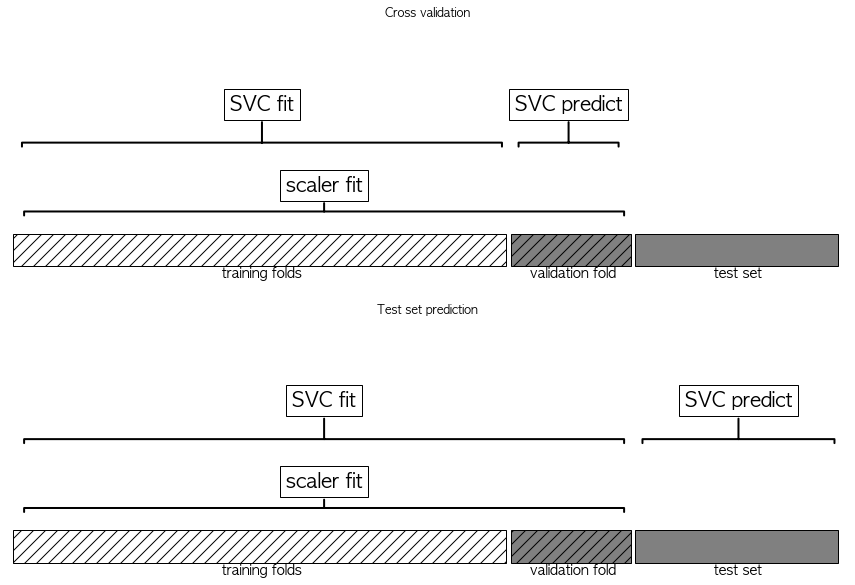

In [3]:
mglearn.plots.plot_improper_processing()

In [4]:
from sklearn.pipeline import Pipeline
pipe = Pipeline([("scaler", MinMaxScaler()), ("svm", SVC())])

In [5]:
pipe.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('scaler', MinMaxScaler(copy=True, feature_range=(0, 1))), ('svm', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

In [6]:
print("테스트 점수 : {:.2f}".format(pipe.score(X_test, y_test)))


테스트 점수 : 0.95


In [9]:
param_grid ={'svm__C':[0.001, 0.01, 0.1, 1, 10, 100],
             'svm__gamma':[0.001, 0.01, 0.1, 1, 10, 100]}

In [10]:
grid = GridSearchCV(pipe, param_grid=param_grid, cv=5)
grid.fit(X_train, y_train)
print("최상의 교차 검증 정확도: {:.2f}".format(grid.best_score_))
print("테스트 점수 점수: {:.2f}".format(grid.score(X_test, y_test)))
print("최적의 매개변수: {}".format(grid.best_params_))

최상의 교차 검증 정확도: 0.98
테스트 점수 점수: 0.97
최적의 매개변수: {'svm__C': 1, 'svm__gamma': 1}


In [11]:
rnd = np.random.RandomState(seed=0)
X = rnd.normal(size=(100, 10000))
y = rnd.normal(size=(100,))

In [12]:
from sklearn.feature_selection import SelectPercentile, f_regression

select = SelectPercentile(score_func=f_regression, percentile=5).fit(X, y)
X_selected = select.transform(X)
print("X_selected.shape: {}".format(X_selected.shape))

X_selected.shape: (100, 500)


In [13]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge
print("교차 검증 정확도 (릿지): {:.2f}".format(np.mean(cross_val_score(Ridge(), X_selected, y, cv=5))))

교차 검증 정확도 (릿지): 0.91


In [14]:
pipe = Pipeline([("select", SelectPercentile(score_func=f_regression, percentile=5)), ("ridge", Ridge())])
print("교차 검증 정확도 (파이프라인): {:.2f}".format(np.mean(cross_val_score(pipe, X, y, cv=5))))

교차 검증 정확도 (파이프라인): -0.25


In [15]:
def fit(self, X, y):
    X_transformed = X
    for name, estimator in self.steps[:-1]:
        X_transformed = estimator.fit_transform(X_transformed, y)
    self.steps[-1][1].fit(X_transformed, y)
    return self

In [16]:
def predict(self, X):
    X_transformed = X
    for step in self.steps[:-1]:
        X_transformed = step[1].transform(X_transformed)
    return self.steps[-1][1].predict(X_transformed)

In [17]:
from sklearn.pipeline import make_pipeline

pipe_long = Pipeline([("scaler", MinMaxScaler()), ("svm", SVC(C=100))])
pipe_short = make_pipeline(MinMaxScaler(), SVC(C=100))

In [18]:
print("파이프라인 단계/n{}".format(pipe_short.steps))

파이프라인 단계/n[('minmaxscaler', MinMaxScaler(copy=True, feature_range=(0, 1))), ('svc', SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))]


In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
pipe = make_pipeline(StandardScaler(), PCA(n_components=2), StandardScaler())
print("파이프라인 단계:/n{}".format(pipe.steps))

파이프라인 단계:/n[('standardscaler-1', StandardScaler(copy=True, with_mean=True, with_std=True)), ('pca', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('standardscaler-2', StandardScaler(copy=True, with_mean=True, with_std=True))]


In [21]:
pipe.fit(cancer.data)
# pca단계의 두개 주성분 추출
components =pipe.named_steps["pca"].components_
print("components.shape: {}".format(components.shape))

components.shape: (2, 30)


In [22]:
from sklearn.linear_model import LogisticRegression
pipe = make_pipeline(StandardScaler(), LogisticRegression())

In [23]:
param_grid = {'logisticregression__C':[0.01, 0.1, 1, 10, 100]}

In [24]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=4)
grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('logisticregression', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'logisticregression__C': [0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [25]:
print("최상의 모델/n{}".format(grid.best_estimator_))

최상의 모델/nPipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('logisticregression', LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])


In [26]:
print("로지스틱 회귀 단계:/n{}".format(grid.best_estimator_.named_steps["logisticregression"]))

로지스틱 회귀 단계:/nLogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


In [27]:
print("로지스틱 회귀 단계:/n{}".format(grid.best_estimator_.named_steps["logisticregression"].coef_))

로지스틱 회귀 단계:/n[[-0.38856355 -0.37529972 -0.37624793 -0.39649439 -0.11519359  0.01709608
  -0.3550729  -0.38995414 -0.05780518  0.20879795 -0.49487753 -0.0036321
  -0.37122718 -0.38337777 -0.04488715  0.19752816  0.00424822 -0.04857196
   0.21023226  0.22444999 -0.54669761 -0.52542026 -0.49881157 -0.51451071
  -0.39256847 -0.12293451 -0.38827425 -0.4169485  -0.32533663 -0.13926972]]


In [28]:
from sklearn.datasets import load_boston
boston = load_boston()
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, random_state=0)

from sklearn.preprocessing import PolynomialFeatures
pipe = make_pipeline(StandardScaler(), PolynomialFeatures(), Ridge())

In [32]:
param_grid ={'polynomialfeatures__degree': [1,2,3], 'ridge__alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

In [33]:
grid=GridSearchCV(pipe, param_grid=param_grid, cv=5, n_jobs=-1)
grid.fit(X_train, y_train)

In [ ]:
mglearn.tools.heatmap(grid.cv_results_['mean_test_score'].reshpae(3, -1), xlabel='ridge__alpha', ylabel='polynomialfeatures__degree', 
                      xticklabels=param_grid['ridge__alpha'], yticklabels=param_grid['polynomialfeatures__degree'], vmin=0)

In [ ]:
print("최적의 매개변수 {}".format(grid.best_params_))

In [6]:
print("테스트 점수: {:.2f}".format(grid.score(X_test, y_test)))

In [6]:
param_grid = {'ridge__alpha':[0.001, 0.01, 0.1, 1, 10, 100]}
pipe = make_pipeline(StandardScaler(), Ridge())
grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(X_train, y_train)
print("다항 특성이 없을때 점수 {:.2f}".format(grid.score(X_test, y_test)))

In [ ]:
pipe = Pipeline([('preprocessig', StandardScaler()), ('classifier', SVC())])

In [ ]:
from sklearn.ensemble import RandomForestClassifier

param_grid = [
    {'classifier': [SVC()], 'preprocessig':[StandardScaler()], 'classifier__gamma': [0.001, 0.01, 0.1, 1, 10, 100],
     'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100]},
    {'classifier':[RandomForestClassifier(n_estimators=100)], 'preprocessig':[None], 'classifier__max_features':[1,2,3]}]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, random_state=0)

grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(X_train, y_train)

print("최적의 매개변수:\n{}\n".format(grid.best_params_))
print("최상의 교차 검증 점수:{:.2f}".format(grid.best_score_))
print("테스트 점수: {:.2f}".format(grid.score(X_test, y_test)))